<a href="https://colab.research.google.com/github/harshitadd/Celestini/blob/master/RawVsJPG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip install rawpy  ##tells collab that this is a cmd - whatever cmd , just prefix  !
import numpy as np 
import cv2 
import rawpy 
import imageio
from sklearn.linear_model import LinearRegression 
import os 
import math
import matplotlib.pyplot as plt 


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/RAW/'  #change dir to your project folder


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:

temp = os.listdir('/content/gdrive/My Drive/RAW/RAW_Batch1')
images=[]
name_jpg=[]
#loading .dng files 
for name in temp: 
  if(name.endswith('.dng')):
    path = '/content/gdrive/My Drive/RAW/RAW_Batch1/' + str(name)
    images.append(path)
  if(name.endswith('.jpg')):
    name_jpg.append(name)
  
images_rgb=[]
#converting them into rgb files
for image in images:
  read = rawpy.imread(image)
  images_rgb.append(read.postprocess())
  
print(len(images_rgb))
print(images_rgb)
  
images_jpg=[]
for image in name_jpg:
  read = cv2.imread(image)
  images_jpg.append(read) 
  
print(len(images_jpg))
print(images_jpg)

20
[array([[[118, 129, 136],
        [118, 129, 136],
        [122, 131, 136],
        ...,
        [119, 123, 127],
        [114, 120, 128],
        [109, 121, 128]],

       [[118, 129, 138],
        [118, 130, 137],
        [122, 132, 134],
        ...,
        [120, 121, 127],
        [115, 118, 128],
        [110, 119, 128]],

       [[122, 129, 140],
        [123, 130, 137],
        [127, 128, 135],
        ...,
        [123, 125, 125],
        [119, 121, 126],
        [115, 118, 127]],

       ...,

       [[112,  85,  73],
        [113,  86,  69],
        [111,  91,  64],
        ...,
        [158, 114,  93],
        [158, 107,  94],
        [154, 113,  92]],

       [[108,  82,  79],
        [109,  82,  74],
        [106,  87,  67],
        ...,
        [156, 115,  93],
        [155, 113,  92],
        [154, 113,  91]],

       [[104,  81,  79],
        [104,  83,  74],
        [101,  85,  69],
        ...,
        [153, 115,  93],
        [154, 116,  90],
        [154, 115,  

In [0]:
def transmission(img, lt = 230, retMean = False):
  ker = np.ones((3, 3))/9.0
  imgrgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  b, g, r = cv2.split(img)
  hsv = cv2.cvtColor(imgrgb, cv2.COLOR_RGB2HSV)
  _, _, v = cv2.split(hsv)
  v_blur = cv2.filter2D(v, -1, ker)
  _,building_mask = cv2.threshold(v_blur, lt, 255, cv2.THRESH_BINARY)
  sky = cv2.bitwise_and(imgrgb, imgrgb, mask = building_mask)
  sky_mask = cv2.bitwise_not(building_mask, building_mask.copy())
  building = cv2.bitwise_and(imgrgb, imgrgb, mask = sky_mask)
  #f, ax = plt.subplots(2, 1, figsize = (15, 15))
  #ax[0].imshow(imgrgb)
  #ax[1].imshow(sky)
  #ax[2].imshow(building)
  al = max(v_blur.flatten())
  #Airlight Found. Now calculate Transmission Map
  img_norm = img/float(al)
  b, g, r = cv2.split(img_norm)
  kernel = np.ones((3,3),np.uint8)
  im_new = np.zeros((img.shape[0], img.shape[1]))
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      im_new[i][j] = min(b[i][j], g[i][j], r[i][j])
  dcp = cv2.erode(im_new, kernel, iterations = 1)
  #ax[3].imshow(im_new, cmap = 'gray')
  #ax[4].imshow(dcp, cmap = 'gray')
  tr = np.ones((dcp.shape[0], dcp.shape[1]))
  for i in range(dcp.shape[0]):
    for j in range(dcp.shape[1]):
      tr[i][j] = 1 - dcp[i][j]
  #ax[1].imshow(tr, cmap = 'gray')
  if retMean == False:
    return tr
  elif retMean == True:
    return np.mean(tr)
  
  
  

In [16]:
transmission(rgb,retMean = True)

0.5740106030886226

In [0]:
def contrast(image):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  s = 0
  ss = 0
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      s += image[i][j]
  avg = s/float(image.size)
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      ss += np.square((image[i][j] - avg))
  contr = np.sqrt(ss/float(image.size))
  return contr

In [24]:
contrast(rgb)

62.830787491607325

In [0]:
def entropy(image):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  hist = cv2.calcHist( [image.astype('float32')],
              [0], 
              None,
               [256], 
              [0,256] )
  h_norm = 0
  h_norm = cv2.normalize(hist, h_norm)
  ent = 0
  for p in h_norm:
    try:
      ent += p*math.log(p, 2)
    except:
      pass
  return (-1 * ent[0])

In [66]:
trans_rgb=[]
for img in images_rgb: 
  k=transmission(img, retMean= True)
  print(k)
  trans_rgb.append(k)

0.5740106030886226
0.5740106030886226


In [67]:
trans_jpg=[]
for img in images_jpg: 
  k=transmission(img, retMean= True)
  print(k)
  trans_jpg.append(k)

0.6556237609133888
0.6556237609133888


In [68]:
contrast_rgb=[]
for img in images_rgb:
  k=contrast(img)
  contrast_rgb.append(k)
  print(k)
  

62.830787491607325
62.830787491607325


In [0]:
contrast_jpg=[]
for img in images_jpg:
  k=contrast(img)
  contrast_jpg.append(k)
  print(k)

In [70]:
entropy_rgb=[]
for img in images_rgb:
  k=entropy(img)
  entropy_rgb.append(k)
  print(k)

49.28406524658203
49.382633209228516


In [71]:
entropy_jpg=[]
for img in images_jpg:
  k=entropy(img)
  entropy_jpg.append(k)
  print(k)

51.80630874633789
51.80630874633789


/content/gdrive/My Drive/RAW/RAW_2019_06_12_07_18_25_421.dng


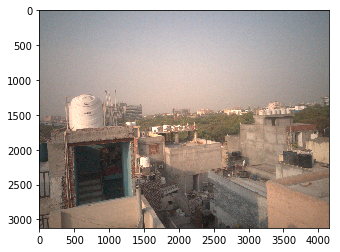

In [82]:
path = '/content/gdrive/My Drive/RAW/' + str(temp[0])
print(path)

image = rawpy.imread(path)
plt.imshow(image.postprocess())